In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler

In [2]:
# Import the dataset
# Assuming the dataset is in the same directory as this script
path = 'data/diabetes_prediction_dataset.csv'
data = pd.read_csv(path, delimiter=',')

In [3]:
# See the shape of the dataset
data.shape

(100000, 9)

In [4]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [5]:
data.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [6]:
# Delete empty data or unvalid data 
data = data.dropna(axis=0)

In [7]:
# Check the last 5 rows again
data.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [8]:
# Check the size of gender column
df = data.groupby(by='gender').size()
df

gender
Female    58552
Male      41430
Other        18
dtype: int64

In [9]:
# Check the size of smoking_history column
df = data.groupby(by='smoking_history').size()
df

smoking_history
No Info        35816
current         9286
ever            4004
former          9352
never          35095
not current     6447
dtype: int64

In [10]:
# Convert categorical string values to numerical values
# Male: 0
# Female: 1
# Other: 2

data["gender"] = data["gender"].str.replace("Male", "0")
data["gender"] = data["gender"].str.replace("Female", "1")
data["gender"] = data["gender"].str.replace('Other', "2")


In [11]:
# Smoking history
# No info: 0
# not current: 1
# current: 2
# former: 3
# never: 4
# ever: 5


data["smoking_history"]= data["smoking_history"].str.replace("No Info", "0")
data["smoking_history"]= data["smoking_history"].str.replace("not current", "1")
data["smoking_history"]= data["smoking_history"].str.replace("current", "2")
data["smoking_history"]= data["smoking_history"].str.replace("former", "3")
data["smoking_history"]= data["smoking_history"].str.replace("never", "4")
data["smoking_history"]= data["smoking_history"].str.replace("ever", "5")

In [12]:
data["gender"] = data["gender"].astype(int)
data["smoking_history"] = data["smoking_history"].astype(int)

In [13]:
# Check the updated data
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.0,0,1,4,25.19,6.6,140,0
1,1,54.0,0,0,0,27.32,6.6,80,0
2,0,28.0,0,0,4,27.32,5.7,158,0
3,1,36.0,0,0,2,23.45,5.0,155,0
4,0,76.0,1,1,2,20.14,4.8,155,0


In [14]:
# Overview of the dataset
data.describe

<bound method NDFrame.describe of        gender   age  hypertension  heart_disease  smoking_history    bmi  \
0           1  80.0             0              1                4  25.19   
1           1  54.0             0              0                0  27.32   
2           0  28.0             0              0                4  27.32   
3           1  36.0             0              0                2  23.45   
4           0  76.0             1              1                2  20.14   
...       ...   ...           ...            ...              ...    ...   
99995       1  80.0             0              0                0  27.32   
99996       1   2.0             0              0                0  17.37   
99997       0  66.0             0              0                3  27.83   
99998       1  24.0             0              0                4  35.42   
99999       1  57.0             0              0                2  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0

In [15]:
# Overview of the dataset by statistics
data.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.585880,41.885856,0.07485,0.039420,2.134750,27.320767,5.527507,138.058060,0.085000
std,0.492937,22.516840,0.26315,0.194593,1.826654,6.636783,1.070672,40.708136,0.278883
min,0.000000,0.080000,0.00000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,0.000000,24.000000,0.00000,0.000000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,1.000000,43.000000,0.00000,0.000000,2.000000,27.320000,5.800000,140.000000,0.000000
75%,1.000000,60.000000,0.00000,0.000000,4.000000,29.580000,6.200000,159.000000,0.000000
max,2.000000,80.000000,1.00000,1.000000,5.000000,95.690000,9.000000,300.000000,1.000000


In [16]:
# Define X as a trained data and y as a target data
X = data.iloc[:, :-1]
y = data.iloc[:,-1]


In [17]:
# Scale the data 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled[0:5])

[[ 8.40111264e-01  1.69270354e+00 -2.84439447e-01  4.93637859e+00
   1.02113430e+00 -3.21055792e-01  1.00170572e+00  4.77042159e-02]
 [ 8.40111264e-01  5.38006427e-01 -2.84439447e-01 -2.02577655e-01
  -1.16867254e+00 -1.15583678e-04  1.00170572e+00 -1.42620999e+00]
 [-1.18855498e+00 -6.16690686e-01 -2.84439447e-01 -2.02577655e-01
   1.02113430e+00 -1.15583678e-04  1.61108022e-01  4.89878478e-01]
 [ 8.40111264e-01 -2.61399267e-01 -2.84439447e-01 -2.02577655e-01
  -7.37691179e-02 -5.83232300e-01 -4.92690191e-01  4.16182767e-01]
 [-1.18855498e+00  1.51505783e+00  3.51568677e+00  4.93637859e+00
  -7.37691179e-02 -1.08197037e+00 -6.79489680e-01  4.16182767e-01]]


In [18]:
print(y)

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64


In [19]:
# Correlation matrix of the dataset
correlation_data = data.corr()  

<Axes: >

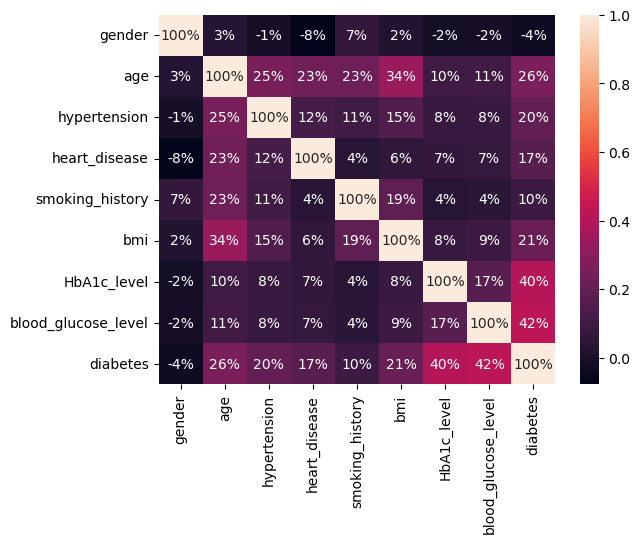

In [20]:
import seaborn as sns 
sns.heatmap(correlation_data, annot=True, fmt='.0%')

In [21]:
# Define the features and target variable using train_test_split() for splitting the dataset by 80:20
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

In [22]:
# Define the model 
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='euclidean')
# Fit the model 
knn.fit(X_train, y_train)


KNeighborsClassifier(metric='euclidean')

In [23]:
# Test the model 
y_pred = knn.predict(X_test)
y_pred


array([0, 0, 0, ..., 0, 0, 0], shape=(20000,))

In [24]:
y_test

43660    0
87278    0
14317    0
81932    0
95321    1
        ..
73441    0
1341     0
71987    0
26910    0
24890    0
Name: diabetes, Length: 20000, dtype: int64

In [25]:
# Check the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
# Check the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean absolute error: {mae:.2f}")



Accuracy: 96.16%
Mean absolute error: 0.04


In [26]:
new_data = np.array([[1, 80, 0, 1, 4, 25.19, 6.6, 300]])
new_data_scaled = scaler.transform(new_data)
prediction = knn.predict(new_data_scaled)
if prediction == 0:
    print("The patient is not diabetic")
else:
    print("The patient is diabetic")

The patient is diabetic


In [27]:
# Optimize the quantity of neighbors in KNN Model
def elbow(K):
    test_acc = []

    # train the model for every value of K
    for i in K:
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)
        tmp = knn.score(X_test, y_test)*100
        test_acc.append(tmp)

    return test_acc

K = range(1, 21)
test = elbow(K)
for i in test:
    print(f"{i:.2f}%")


95.09%
96.23%
96.05%
96.29%
96.16%
96.28%
96.30%
96.25%
96.30%
96.28%
96.30%
96.33%
96.35%
96.34%
96.36%
96.30%
96.36%
96.29%
96.38%
96.27%


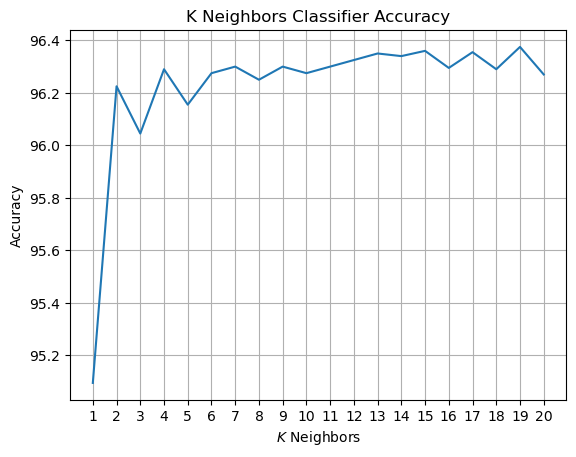

In [28]:
# Visualize the results
plt.plot(K, test)
plt.xlabel("$K$ Neighbors")
plt.ylabel("Accuracy")
plt.title("K Neighbors Classifier Accuracy")
plt.xticks(K)
plt.grid()

In [29]:
# save the model 
import pickle

filename = 'diabetes_model.pkl'
pickle.dump(knn, open(filename, 'wb'))


In [30]:
# load the model 
loaded_model = pickle.load(open(filename, 'rb'))
new_data_2 = np.array([[1, 44, 0, 0, 2, 19.3, 4.0, 100]])
new_data_2_scaled = scaler.transform(new_data_2)
prediction_2 = loaded_model.predict(new_data_2_scaled)
if prediction_2 == 0:
    print("The patient is not diabetic")
else:
    print("The patient is diabetic")



The patient is not diabetic
